In [1]:
import sys
sys.path.append("..")
sys.path.append("../dl")

import torch
import segmentation_models_pytorch as smp
from omegaconf import OmegaConf
from torch import nn

from config import conf
from inferer import *
from lightning_model import *

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
model = smp.FPN(
    encoder_name="resnext50_32x4d",
    classes=2,
    decoder_merge_policy='cat'
)

segmodel = SegModel.from_conf(model, conf)
ckpt = segmodel.fm.model_checkpoint("last")
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
segmodel.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(segmodel, conf)

In [4]:
infobj = inf.run()

Prediction for: test_1


/home/leos/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.



Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [5]:
# inf.plot_histograms()

In [6]:
# inf.plot_predictions()

In [7]:
inf.post_process()

In [8]:
# inf.plot_segmentations()

In [9]:
inf.benchmark()

,AJI,AJI plus,DICE2,PQ,SQ,DQ,inst Sensitivity,inst Precision,splits,merges
test_1_metrics,0.280865,0.436871,0.389024,0.410552,0.717323,0.572339,0.519075,0.637784,0.351298,1.074337
test_10_metrics,0.423304,0.471160,0.542060,0.448223,0.758955,0.590580,0.578698,0.602959,0.566126,0.822168
test_11_metrics,0.259968,0.381449,0.390841,0.243149,0.693620,0.350551,0.280409,0.467492,0.467005,1.198346
test_12_metrics,0.582521,0.604419,0.689509,0.488313,0.748054,0.652778,0.658879,0.646789,0.277799,0.565231
test_13_metrics,0.443840,0.504907,0.605248,0.419202,0.746408,0.561626,0.487859,0.661677,0.470279,1.180583
test_14_metrics,0.462616,0.511041,0.637007,0.448644,0.768114,0.584085,0.640288,0.536953,0.844202,0.585735
test_2_metrics,0.513194,0.516565,0.643020,0.347885,0.709150,0.490566,0.583673,0.423077,0.224918,0.589333
test_3_metrics,0.455352,0.526722,0.574438,0.428671,0.726464,0.590078,0.573604,0.607527,0.318168,0.915633
test_4_metrics,0.441593,0.504834,0.545080,0.383427,0.733624,0.522648,0.538278,0.507901,0.430904,0.943895
test_5_metrics,0.396564,0.468412,0.511619,0.435592,0.744862,0.584795,0.549451,0.625000,0.491004,1.303729


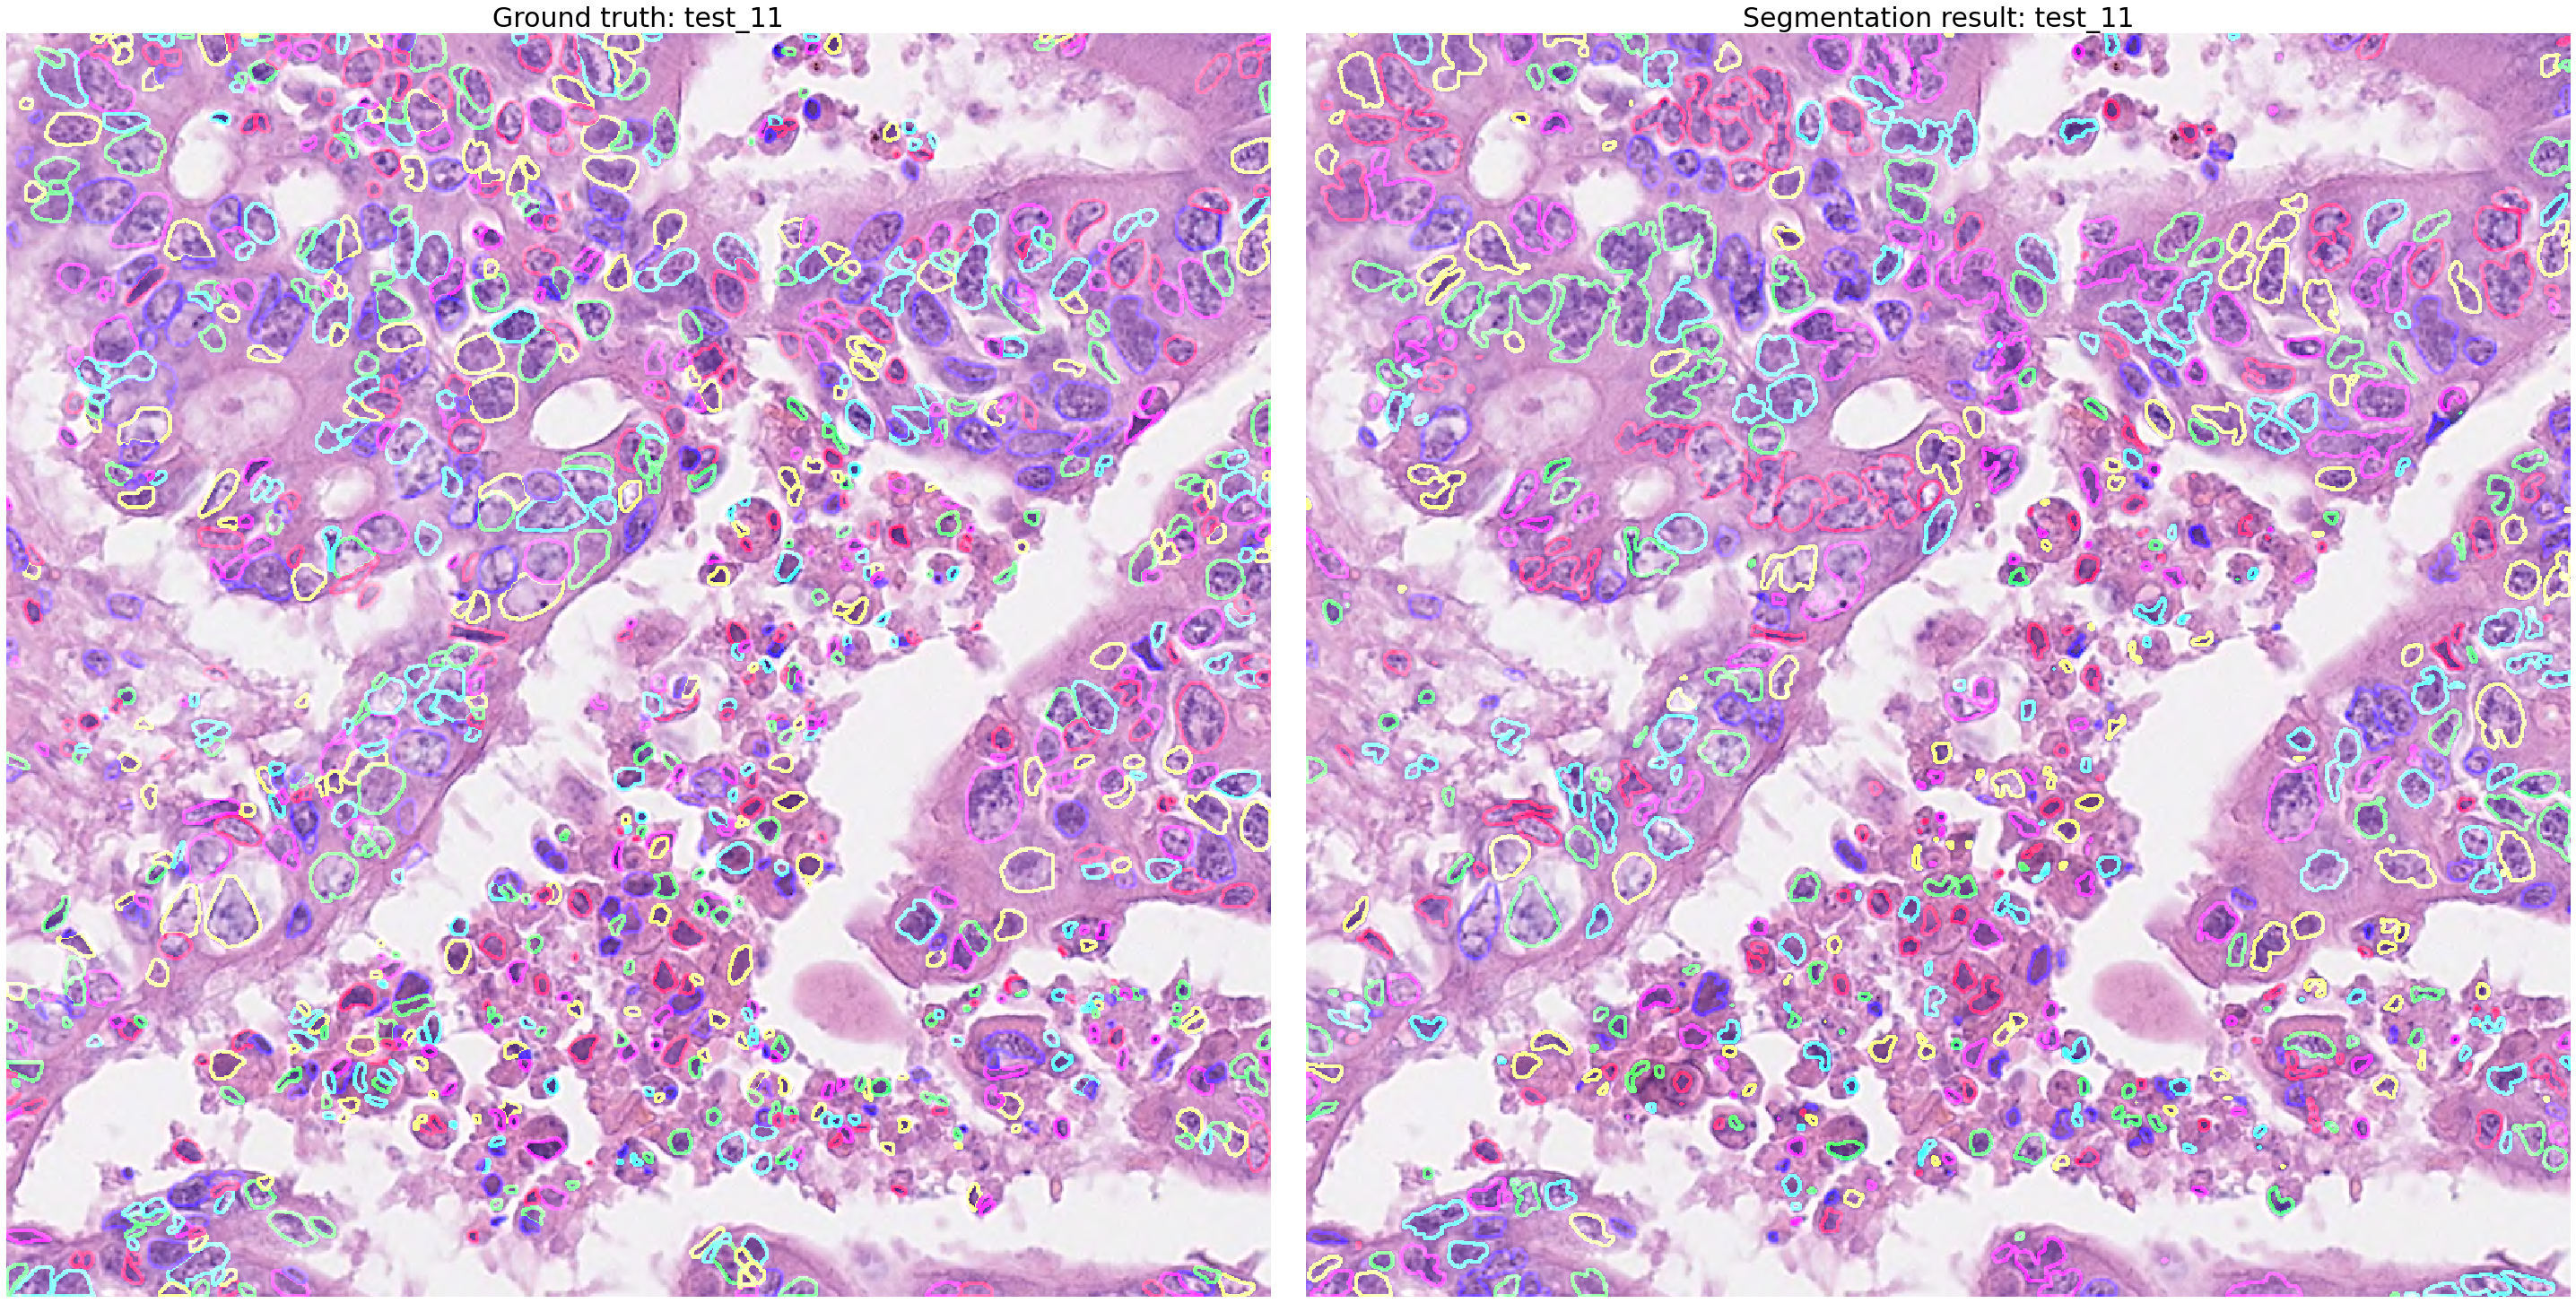

In [10]:
inf.plot_overlays(ixs=[2])

In [11]:
# inf.save_outputs()